# MTData: Grid Example

It is becoming more common for MT data to be collected in a grid rather than a profile because of 3D inversions.  In this example we can take a look at how to work with MT data collected on a grid.  We will use the same MTCollection from the first example.  

## 1. Load data

First we will open the MTCollection and change the working dataframe to get only those station in the 'grid' survey.

In [4]:
from pathlib import Path
from mtpy import MTCollection

In [7]:
mtc = MTCollection()
mtc.open_collection(Path().cwd().joinpath("test_mt_collection.h5"))
mtc.working_dataframe = mtc.master_dataframe.loc[mtc.master_dataframe.survey == "grid"]
mtd = mtc.to_mt_data()

In [8]:
mtc.close_collection()

2023-04-14 12:23:43,951 [line 755] mth5.mth5.MTH5.close_mth5 - INFO: Flushing and closing C:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\mtpy\examples\notebooks\test_mt_collection.h5


## 2. Plot Station Locations

To make sure we got the data we expected, we can plot the station locations.  You can change the basemap, see [providers](https://contextily.readthedocs.io/en/latest/intro_guide.html#Providers) for more details

2023-04-14T12:24:43 [line 140] rasterio._env.open - INFO: GDAL signalled an error: err_no=4, msg="`/vsimem/482fd3da-57ae-4b22-a0b8-e5340ffbb287/482fd3da-57ae-4b22-a0b8-e5340ffbb287.tif' not recognized as a supported file format."


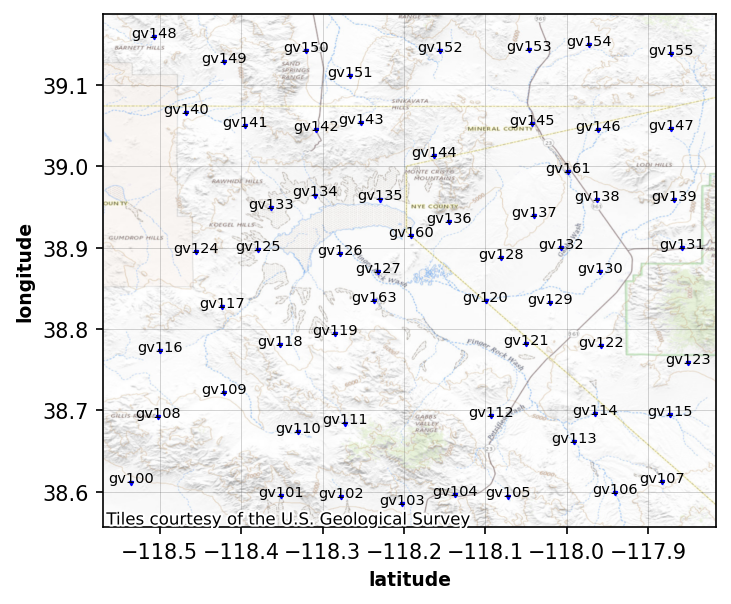

In [12]:
station_plot = mtd.plot_stations()

### 2a. Change basemap

Here is an example of how to change the basemap.  We it to use the ESRI terrain map.

In [13]:
import contextily as cx

2023-04-14T12:27:13 [line 140] rasterio._env.open - INFO: GDAL signalled an error: err_no=4, msg="`/vsimem/22d9f171-3c63-4f9d-9d13-fe5b230fe571/22d9f171-3c63-4f9d-9d13-fe5b230fe571.tif' not recognized as a supported file format."


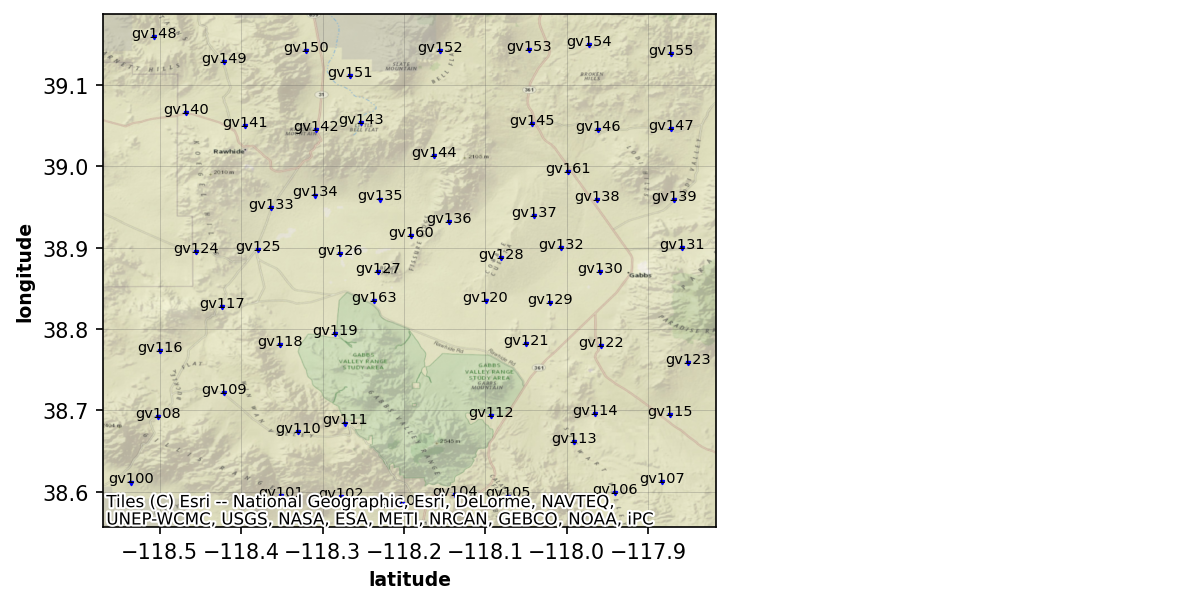

In [14]:
station_plot.cx_source = cx.providers.Esri.NatGeoWorldMap
station_plot.redraw_plot()

## 3. Plot Phase Tensor Map

Now that we seem to have the correct data, lets plot phase tensor maps.  These are broadband data with induction vectors, so lets plot those too.  The phase tensor map is busy so lets identify key aspects.  

 - Ellipse shape: the ellipses often elongate in the preferred direction of current flow
 - Ellipse face color: by default are colored by the parameter `phimin` but can be changed by setting the attribute `pt_map.ellipse_colorby`. The `phimin` gives the lower bounds on how the subsurface resistivity is changing, where reds are becoming more conductive and blues are becoming more resistive. 
 - Ellipse edge color: by default is colored by the `skew` angle which is indicative of dimensionality with high skew being 3D. Also the color indicates in which direction currents are being skewed.  
 - Wedges: the long axis is `phimax` and the short axis are `phimin`.
 - Arrows: black are real induction vectors and blue are imaginary induction vectors.

2023-04-14T12:32:57 [line 140] rasterio._env.open - INFO: GDAL signalled an error: err_no=4, msg="`/vsimem/22124c91-1c61-433d-a206-3dc5bf1b20de/22124c91-1c61-433d-a206-3dc5bf1b20de.tif' not recognized as a supported file format."


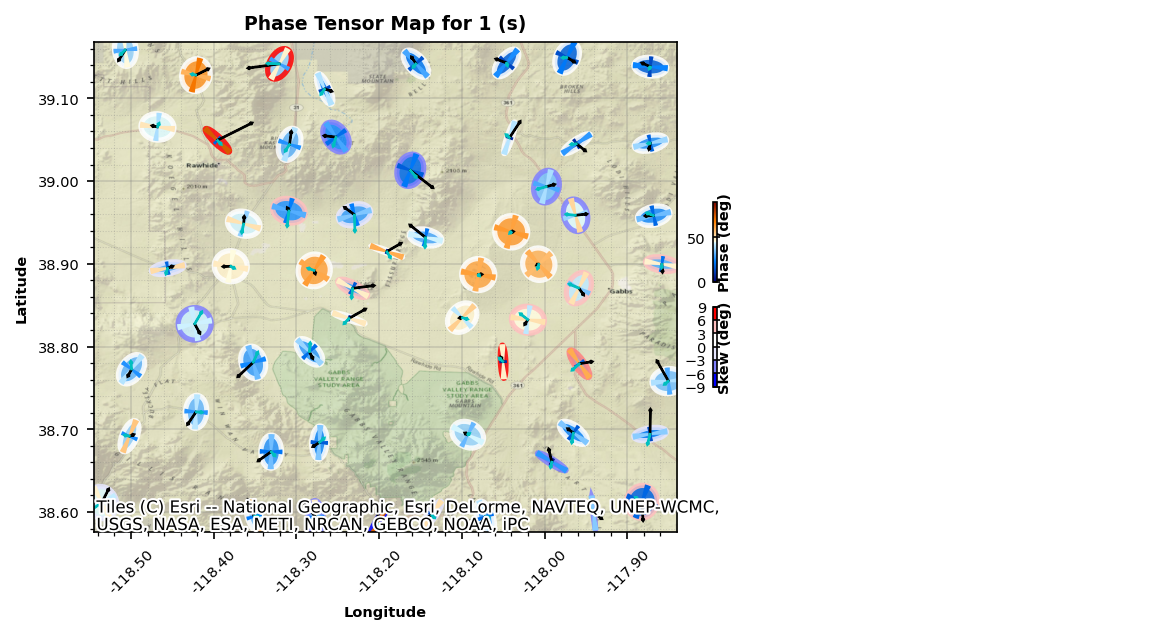

In [20]:
pt_map = mtd.plot_phase_tensor_map(
    plot_tipper="yri", 
    cx_source=cx.providers.Esri.NatGeoWorldMap,
    ellipse_size=.02,
    arrow_size=.05
)

2023-04-14T12:35:55 [line 140] rasterio._env.open - INFO: GDAL signalled an error: err_no=4, msg="`/vsimem/98f1c928-9eb0-4e23-9862-c0a0840d5e97/98f1c928-9eb0-4e23-9862-c0a0840d5e97.tif' not recognized as a supported file format."


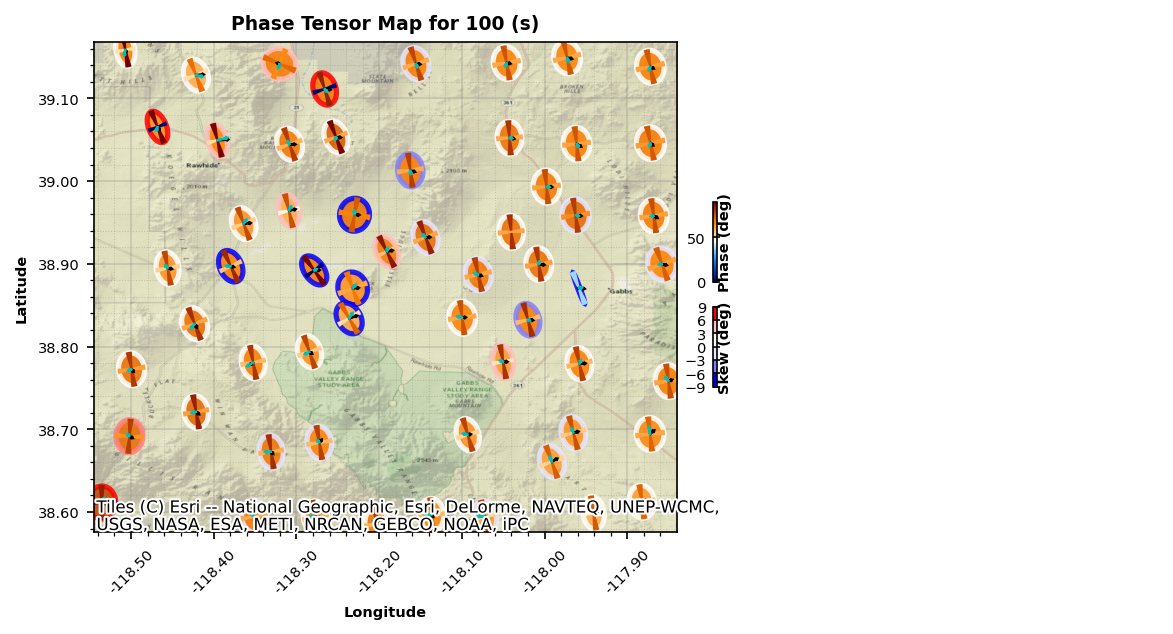

In [21]:
pt_map.plot_period = 100
pt_map.redraw_plot()